## 1 - Importing Libraries & Loading Data

In [1397]:
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn import preprocessing

train_data=pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

## 2.1 - Display Train Data

In [1398]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2.2 - Display Test Data

In [1399]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 3.1 - Check up for columns with missing Data

In [1400]:
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [1401]:
test_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

PoolQC          99.726027
MiscFeature     96.438356
Alley           92.602740
Fence           80.068493
FireplaceQu     50.000000
LotFrontage     15.547945
GarageYrBlt      5.342466
GarageQual       5.342466
GarageFinish     5.342466
GarageCond       5.342466
dtype: float64

## 3.2 -Drop Unwanted Columns ( columns with a lot of missing data)

In [1402]:
train_data.drop(["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"], axis = 1, inplace = True)

In [1403]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1404]:
test_data.drop(["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu"], axis = 1, inplace = True)

In [1405]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


# 4.0 -  Features Selection

## 4.2 - Encode Categorical Features 

In [1406]:
le = preprocessing.LabelEncoder()

## Training Data
train_data["Street"]=le.fit_transform(train_data["Street"])
train_data["MSZoning"]=le.fit_transform(train_data["MSZoning"])
train_data["Condition1"]=le.fit_transform(train_data["Condition1"])
train_data["Condition2"]=le.fit_transform(train_data["Condition2"])
train_data["SaleCondition"]=le.fit_transform(train_data["SaleCondition"])
train_data["Neighborhood"]=le.fit_transform(train_data["Neighborhood"])
train_data["LandSlope"]=le.fit_transform(train_data["LandSlope"])
train_data["BldgType"]=le.fit_transform(train_data["BldgType"])
train_data["Exterior1st"]=le.fit_transform(train_data["Exterior1st"])
train_data["MasVnrType"]=le.fit_transform(train_data["MasVnrType"])
train_data["ExterQual"]=le.fit_transform(train_data["ExterQual"])
train_data["ExterCond"]=le.fit_transform(train_data["ExterCond"])
train_data["Foundation"]=le.fit_transform(train_data["Foundation"])
train_data["BsmtQual"]=le.fit_transform(train_data["BsmtQual"])
train_data["BsmtCond"]=le.fit_transform(train_data["BsmtCond"])
train_data["BsmtExposure"]=le.fit_transform(train_data["BsmtExposure"])
train_data["BsmtFinType1"]=le.fit_transform(train_data["BsmtFinType1"])
train_data["BsmtFinType2"]=le.fit_transform(train_data["BsmtFinType2"])
train_data["Heating"]=le.fit_transform(train_data["Heating"])
train_data["HeatingQC"]=le.fit_transform(train_data["HeatingQC"])
train_data["CentralAir"]=le.fit_transform(train_data["CentralAir"])
train_data["Electrical"]=le.fit_transform(train_data["Electrical"])
train_data["KitchenQual"]=le.fit_transform(train_data["KitchenQual"])
train_data["Functional"]=le.fit_transform(train_data["Functional"])
train_data["GarageType"]=le.fit_transform(train_data["GarageType"])
train_data["GarageFinish"]=le.fit_transform(train_data["GarageFinish"])
train_data["GarageQual"]=le.fit_transform(train_data["GarageQual"])
train_data["GarageCond"]=le.fit_transform(train_data["GarageCond"])
train_data["PavedDrive"]=le.fit_transform(train_data["PavedDrive"])
train_data["SaleType"]=le.fit_transform(train_data["SaleType"])

## testing Data
test_data["Street"]=le.fit_transform(test_data["Street"])
test_data["MSZoning"]=le.fit_transform(test_data["MSZoning"])
test_data["Condition1"]=le.fit_transform(test_data["Condition1"])
test_data["Condition2"]=le.fit_transform(test_data["Condition2"])
test_data["SaleCondition"]=le.fit_transform(test_data["SaleCondition"])
test_data["Neighborhood"]=le.fit_transform(test_data["Neighborhood"])
test_data["LandSlope"]=le.fit_transform(test_data["LandSlope"])
test_data["BldgType"]=le.fit_transform(test_data["BldgType"])
test_data["Exterior1st"]=le.fit_transform(test_data["Exterior1st"])
test_data["MasVnrType"]=le.fit_transform(test_data["MasVnrType"])
test_data["ExterQual"]=le.fit_transform(test_data["ExterQual"])
test_data["ExterCond"]=le.fit_transform(test_data["ExterCond"])
test_data["Foundation"]=le.fit_transform(test_data["Foundation"])
test_data["BsmtQual"]=le.fit_transform(test_data["BsmtQual"])
test_data["BsmtCond"]=le.fit_transform(test_data["BsmtCond"])
test_data["BsmtExposure"]=le.fit_transform(test_data["BsmtExposure"])
test_data["BsmtFinType1"]=le.fit_transform(test_data["BsmtFinType1"])
test_data["BsmtFinType2"]=le.fit_transform(test_data["BsmtFinType2"])
test_data["Heating"]=le.fit_transform(test_data["Heating"])
test_data["HeatingQC"]=le.fit_transform(test_data["HeatingQC"])
test_data["CentralAir"]=le.fit_transform(test_data["CentralAir"])
test_data["Electrical"]=le.fit_transform(test_data["Electrical"])
test_data["KitchenQual"]=le.fit_transform(test_data["KitchenQual"])
test_data["Functional"]=le.fit_transform(test_data["Functional"])
test_data["GarageType"]=le.fit_transform(test_data["GarageType"])
test_data["GarageFinish"]=le.fit_transform(test_data["GarageFinish"])
test_data["GarageQual"]=le.fit_transform(test_data["GarageQual"])
test_data["GarageCond"]=le.fit_transform(test_data["GarageCond"])
test_data["PavedDrive"]=le.fit_transform(test_data["PavedDrive"])
test_data["SaleType"]=le.fit_transform(test_data["SaleType"])


## 4.3 - Fill Features with Null /NA values

In [1407]:
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Id               0.000000
HalfBath         0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
dtype: float64

In [1408]:
train_data['LotFrontage'].fillna(int(train_data['LotFrontage'].mean()), inplace=True)
train_data['MasVnrArea'].fillna(int(train_data['MasVnrArea'].mean()), inplace=True)
train_data['SalePrice'].fillna(int(train_data['SalePrice'].mean()), inplace=True)
train_data['BsmtFinSF1'].fillna(int(train_data['BsmtFinSF1'].mean()), inplace=True)
train_data['GarageYrBlt'].interpolate(method ='linear', limit_direction ='backward', inplace=True)
train_data.isnull().sum().sort_values(ascending=False).head(10) / len(train_data) *100

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
dtype: float64

In [1409]:
test_data['LotFrontage'].fillna(int(test_data['LotFrontage'].mean()), inplace=True)
test_data['MasVnrArea'].fillna(int(test_data['MasVnrArea'].mean()), inplace=True)
test_data['BsmtFinSF1'].fillna(int(test_data['BsmtFinSF1'].mean()), inplace=True)
test_data['GarageCars'].fillna(int(test_data['GarageCars'].mean()), inplace=True)
test_data['TotalBsmtSF'].fillna(int(test_data['TotalBsmtSF'].mean()), inplace=True)
test_data['GarageYrBlt'].interpolate(method ='linear', limit_direction ='backward', inplace=True)
test_data['BsmtHalfBath'].interpolate(method ='linear', limit_direction ='backward', inplace=True)
test_data['BsmtFullBath'].interpolate(method ='linear', limit_direction ='backward', inplace=True)
test_data.isnull().sum().sort_values(ascending=False).head(15) / len(test_data) *100

Utilities       0.13708
Exterior2nd     0.06854
BsmtUnfSF       0.06854
BsmtFinSF2      0.06854
GarageArea      0.06854
Id              0.00000
HalfBath        0.00000
TotRmsAbvGrd    0.00000
KitchenQual     0.00000
KitchenAbvGr    0.00000
BedroomAbvGr    0.00000
BsmtHalfBath    0.00000
FullBath        0.00000
Fireplaces      0.00000
BsmtFullBath    0.00000
dtype: float64

## 4.2 - Test Correlation between Targeted predicitions and Possible Features

In [1422]:
corr_with=train_data.corrwith(train_data["SalePrice"]).sort_values(ascending=False)
print(corr_with[corr_with>0].head(25),"\n-------------------------")
print(corr_with[corr_with<0].tail(20))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475227
GarageYrBlt     0.467290
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.334897
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
CentralAir      0.251328
Electrical      0.234716
PavedDrive      0.231357
dtype: float64 
-------------------------
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
SaleType        -0.054911
OverallCond     -0.077856
MSSubClass      -0.084284
BldgType        -0.085591
Heating         -0.098812
BsmtFinType1    -0.103114
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
MSZoning        -0.16

## 4.3 Decide Which Features is best to use

<AxesSubplot:>

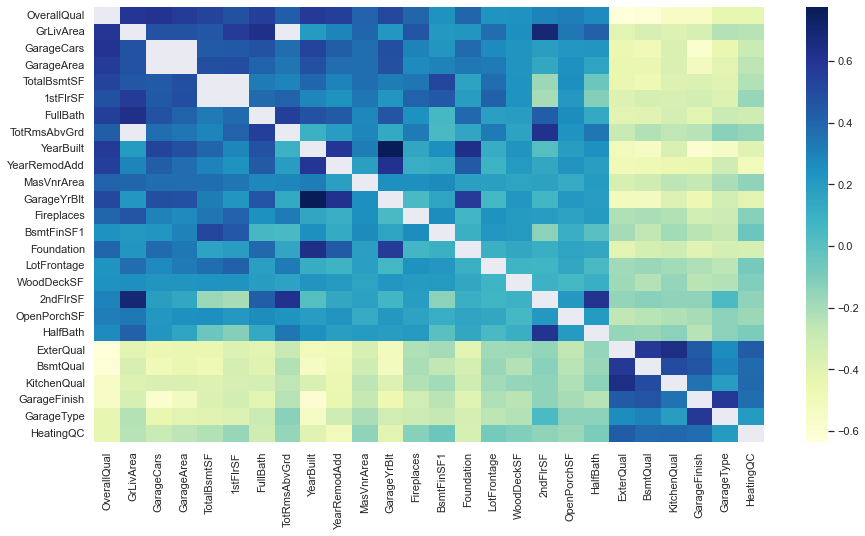

In [1411]:
list_of_columns =["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF",
                  "1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd",
                  "MasVnrArea","GarageYrBlt","Fireplaces","BsmtFinSF1","Foundation",
                  "LotFrontage","WoodDeckSF","2ndFlrSF","OpenPorchSF","HalfBath",
                  "ExterQual","BsmtQual","KitchenQual","GarageFinish","GarageType","HeatingQC"]


X = train_data[list_of_columns]
y = train_data.SalePrice
corr = X.corr()
sns.set(rc = {'figure.figsize':(15,8)})


sns.heatmap(corr,mask=corr > 0.8,cmap="YlGnBu")

## Seeing this heat map we can remove the features with very high correlations between each other so we have unique features

### we need ro remove one of "GarageArea" or "GarageCars"
### we need ro remove one of ,"TotalBsmtSF","1stFlrSF" ...

## 4.4 - Selected Features Display

<AxesSubplot:>

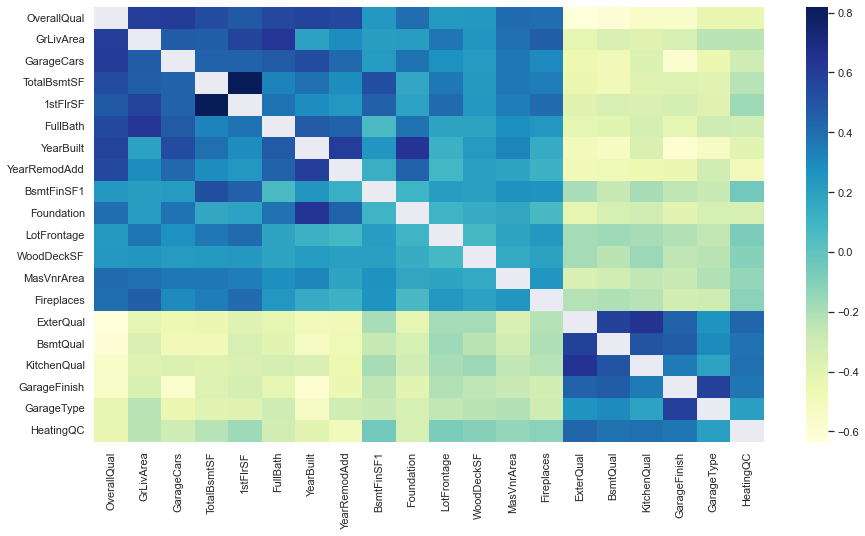

In [1412]:
list_of_columns =["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","1stFlrSF",
                  "FullBath","YearBuilt","YearRemodAdd","BsmtFinSF1","Foundation",
                  "LotFrontage","WoodDeckSF","MasVnrArea","Fireplaces",
                  "ExterQual","BsmtQual","KitchenQual","GarageFinish","GarageType","HeatingQC"]


X = train_data[list_of_columns]
y = train_data.SalePrice
corr = X.corr()
sns.heatmap(corr,mask=corr > 0.85,cmap="YlGnBu")

## 5 -  Scale ( Standarize ) &  split data into Train | Validation 

In [1413]:
scalar =preprocessing.StandardScaler()
X_scaled=pd.DataFrame(scalar.fit_transform(X),columns = X.columns)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                  test_size=0.1,
                                                 random_state = 42)
print('train:', len(X_train), 'validation:', len(X_val))

train: 1314 validation: 146


## 6.1 - Apply Linear Regression on Training Set

In [1437]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_train)

y= y_train.ravel()

y_pred=y_pred.ravel()
y_pred =abs(y_pred)
y_pred

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))


Root-Mean-Squared-Error : 0.169


## 6.2 - Apply Linear Regression coefficients on Validation Set

In [1436]:
y_pred=model.predict(X_val)
y= y_val.ravel()
y_pred=y_pred.ravel()
y_pred =abs(y_pred)

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))


Root-Mean-Squared-Error : 0.1701


## 6.3 - Apply Linear Regression coefficients on Testing Set and produce Submision

In [1416]:

X_test = test_data[list_of_columns]
X_test_scaled=pd.DataFrame(scalar.fit_transform(X_test),columns = X_test.columns)

X_test_scaled["y_pred"]=model.predict(X_test_scaled)
X_test_scaled["Id"]=test_data["Id"]
X_test_scaled["y_pred"]=abs(X_test_scaled["y_pred"])

In [1417]:
Output = pd.DataFrame()
Output['Id'] = X_test_scaled['Id']
Output['SalePrice'] = X_test_scaled['y_pred']
Output.to_csv('/Users/ibrahim/Desktop/AIS/submission.txt', index=False)

## 7.1 - Apply Random Forest Regression coefficients on Trainign Set

In [1465]:
regr = RandomForestRegressor(n_estimators=1000,max_depth=40, random_state=42,criterion="squared_error")
regr.fit(X_train, y_train)
y_pred=regr.predict(X_train)
y= y_train.ravel()

y_pred=y_pred.ravel()
y_pred =abs(y_pred)
y_pred

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))

Root-Mean-Squared-Error : 0.0629


## 7.2 - Apply Random Forest Regression coefficients on Validation Set

In [1466]:
y_pred=regr.predict(X_val)
y= y_val.ravel()
y_pred=y_pred.ravel()
y_pred =abs(y_pred)

print("Root-Mean-Squared-Error :",compute_rmsle(y,y_pred,4))

Root-Mean-Squared-Error : 0.1393


## 7.3 - Apply Random Forest Regressionon  on Testing Set and produce Submision

In [1467]:
X_test = test_data[list_of_columns]
X_test_scaled=pd.DataFrame(scalar.fit_transform(X_test),columns = X_test.columns)

X_test_scaled["y_pred"]=regr.predict(X_test_scaled)
X_test_scaled["Id"]=test_data["Id"]
X_test_scaled["y_pred"]=abs(X_test_scaled["y_pred"])

In [1468]:
Output = pd.DataFrame()
Output['Id'] = X_test_scaled['Id']
Output['SalePrice'] = X_test_scaled['y_pred']
Output.to_csv('/Users/ibrahim/Desktop/AIS/submission_1.txt', index=False)